# Import Library

In [1]:
# Libraries Import + Dataset Load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load Dataset

df = pd.read_csv("news.csv")     # path for Colab
df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Exploratory Data Analysis (EDA)

In [3]:
# Dataset structure

# Dataset size
print("Dataset shape:", df.shape)

# Columns
print("\nColumns in dataset:", df.columns.tolist())

# First few rows
df.head()



Dataset shape: (6336, 4)

Columns in dataset: ['Unnamed: 0', 'title', 'text', 'label']


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# Check for nulls
print("\nMissing values:\n")
print(df.isnull().sum())


Missing values:

Unnamed: 0    0
title         1
text          1
label         1
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_20884\210981055.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')


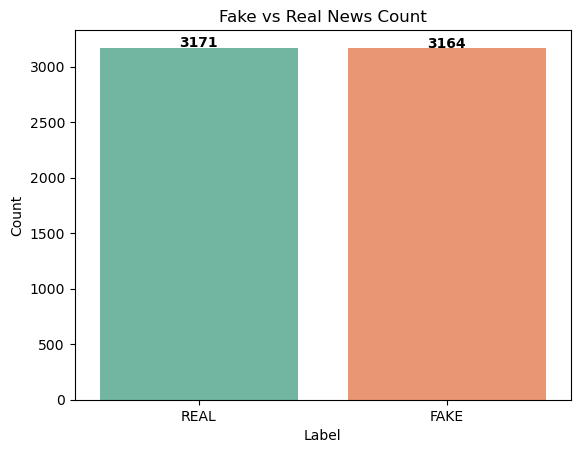

In [5]:
# Label distribution

import seaborn as sns
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()

sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')

for i, v in enumerate(label_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.title('Fake vs Real News Count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


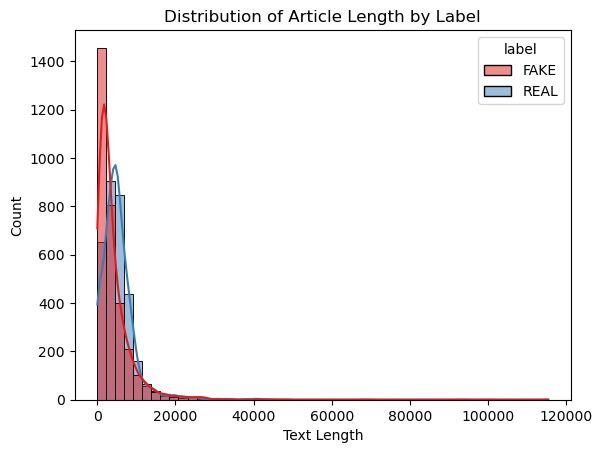

In [6]:
# Distribution of News text

df['text_length'] = df['text'].astype(str).apply(len)

sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='label', palette='Set1')
plt.title('Distribution of Article Length by Label')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


# Text Preprocessing

In [7]:
# Create cleaning function

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        words = text.split()
        words = [stemmer.stem(word) for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        return ""


In [8]:
# Apply cleaning on text column
df['cleaned_text'] = df['text'].apply(clean_text)

In [9]:
# Check Available Columns
print(df.columns)


Index(['Unnamed: 0', 'title', 'text', 'label', 'text_length', 'cleaned_text'], dtype='object')


# Train-Test Split + Vectorization + Model Training

In [10]:
# Data Split (features and labels)

from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [11]:
# Vectorization using TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tf_train = vectorizer.fit_transform(x_train)
tf_test = vectorizer.transform(x_test)


In [12]:
# Model Train (PassiveAggressiveClassifier)

# Combine x_train and y_train to drop NaNs
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
train_df.dropna(inplace=True)

# Update x_train and y_train
x_train = train_df['text']
y_train = train_df['label']

# Re-vectorize after NaN removal
tf_train = vectorizer.fit_transform(x_train)

# Train the model again
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tf_train, y_train)


PassiveAggressiveClassifier(max_iter=50)

In [13]:
# Prediction on text data
y_pred = model.predict(tf_test)


In [14]:
# Accuracy & Confusion Matrix

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)


Accuracy: 92.23%

Confusion Matrix:
[[729  61]
 [ 62 732]]


# Accuracy, Confusion Matrix & Classification Report

In [15]:
# Accuracy & Confusion Matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = model.predict(tf_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 Accuracy: {round(accuracy * 100, 2)}%")

# Confusion Matrix
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



🔹 Accuracy: 92.23%

🔹 Confusion Matrix:
[[729  61]
 [ 62 732]]


In [16]:
# Classification Report (Precision, Recall, F1)

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))



🔹 Classification Report:
              precision    recall  f1-score   support

        FAKE       0.92      0.92      0.92       790
        REAL       0.92      0.92      0.92       794

    accuracy                           0.92      1584
   macro avg       0.92      0.92      0.92      1584
weighted avg       0.92      0.92      0.92      1584



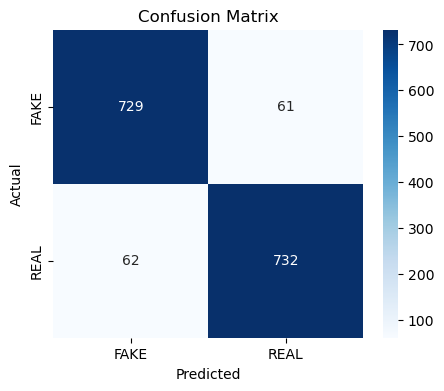

In [17]:
# Visual Confusion Matrix (Seaborn)

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# WordCloud for FAKE and REAL News

In [18]:
# Import & generate WordClouds

from wordcloud import WordCloud

# FAKE News WordCloud
fake_text = df[df['label'] == 'FAKE']['cleaned_text'].str.cat(sep=" ")
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

# REAL News WordCloud
real_text = df[df['label'] == 'REAL']['cleaned_text'].str.cat(sep=" ")
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)


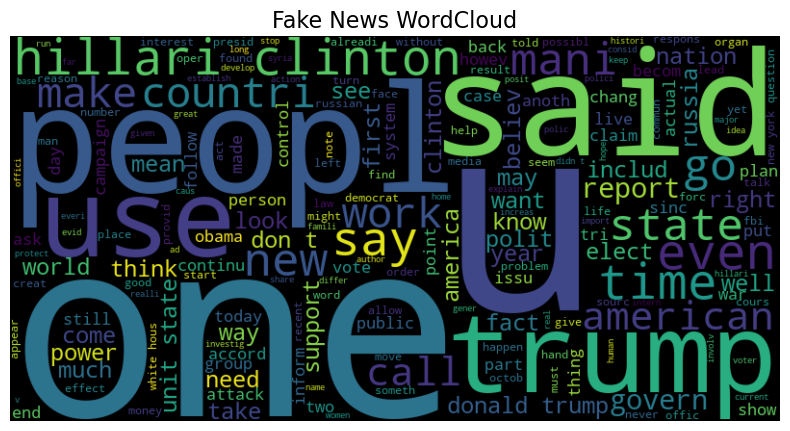

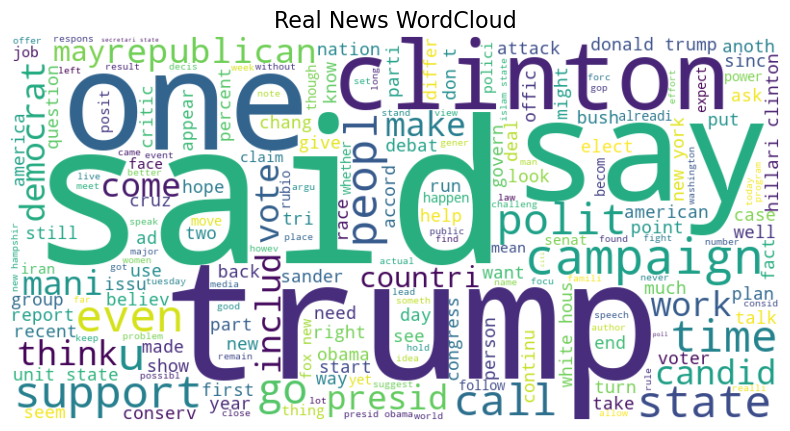

In [19]:
# Plot WordClouds

import matplotlib.pyplot as plt

# FAKE News
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News WordCloud", fontsize=16)
plt.show()

# REAL News
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Real News WordCloud", fontsize=16)
plt.show()


# Most Frequent Words (Bar Graph)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\user\AppData\Local\Temp\ipykernel_20884\440307255.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fake_df, x='count', y='word', palette='Reds_r')


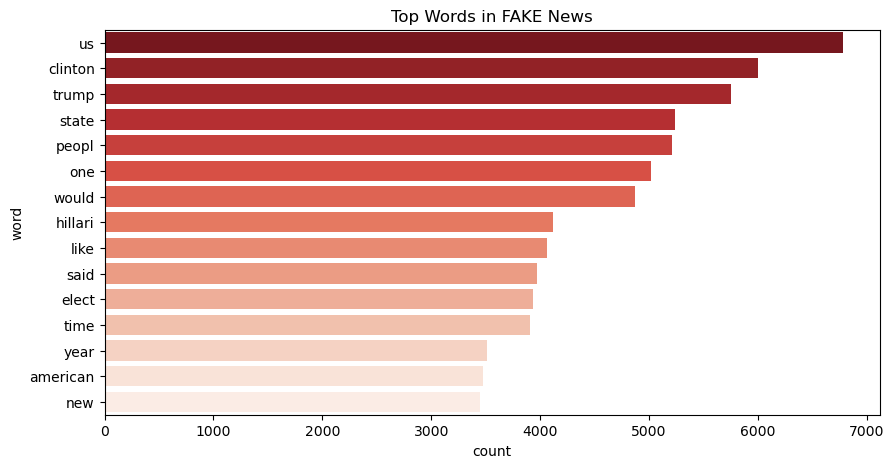

In [20]:
# FAKE news top words

from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# FAKE news
fake_words = ' '.join(df[df['label'] == 'FAKE']['cleaned_text']).split()
filtered_fake_words = [word for word in fake_words if word not in stop_words]
common_fake = Counter(filtered_fake_words).most_common(15)

# Plot
fake_df = pd.DataFrame(common_fake, columns=['word', 'count'])
plt.figure(figsize=(10,5))
sns.barplot(data=fake_df, x='count', y='word', palette='Reds_r')
plt.title("Top Words in FAKE News")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_20884\84585854.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=real_df, x='count', y='word', palette='Blues_r')


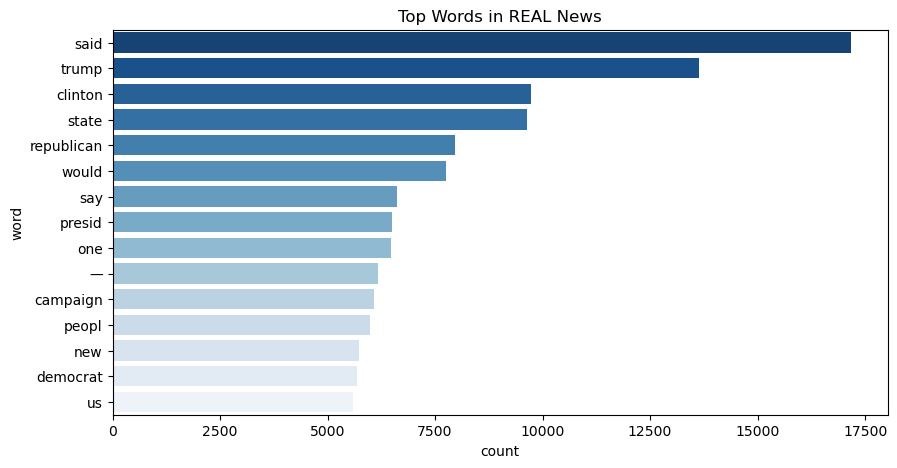

In [21]:
# REAL news top words

# REAL news
real_words = ' '.join(df[df['label'] == 'REAL']['cleaned_text']).split()
filtered_real_words = [word for word in real_words if word not in stop_words]
common_real = Counter(filtered_real_words).most_common(15)

# Plot
real_df = pd.DataFrame(common_real, columns=['word', 'count'])
plt.figure(figsize=(10,5))
sns.barplot(data=real_df, x='count', y='word', palette='Blues_r')
plt.title("Top Words in REAL News")
plt.show()
